In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [14]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M              74.1%
BCFG            7.0%
FG              3.6%
-RA             2.1%
BR              1.5%
RA              1.2%
-RA BCFG        1.0%
RA BCFG         0.7%
BCFG -RA        0.7%
-RA BR          0.6%
RA FG           0.6%
-RA FG          0.6%
RA BR           0.5%
BCFG RA         0.5%
SHRA            0.4%
-DZ             0.3%
VCFG            0.3%
FG DZ           0.3%
FG -RA          0.3%
BCFG -DZ        0.2%
DZ              0.2%
FG RA           0.2%
-DZ FG          0.2%
FG -DZ          0.2%
DZ BCFG         0.2%
+RA FG          0.2%
DZ FG           0.2%
BCFG DZ         0.1%
DZ BR           0.1%
-DZ BCFG        0.1%
-RADZ BCFG      0.1%
-DZ BR          0.1%
+RA BCFG        0.1%
-RADZ           0.1%
+DZ FG          0.1%
-SHRA           0.1%
-RADZ BR        0.1%
+SHRA           0.1%
+RA BR          0.1%
BR RA           0.1%
+RA             0.1%
TS              0.1%
BR -DZ          0.1%
-RADZ FG        0.1%
FG -RADZ        0.1%
BR -RA          0.0%
SHRA BCFG       0.0%
+DZ BR       

In [5]:
#label br/fg

station["brfg_l"] = "No BR/FG"
mask = station['wxcodes_o'].str.contains("BR")
station.loc[mask,["brfg_l"]] = "BR/FG"
mask = station['wxcodes_o'].str.contains("FG")
station.loc[mask,["brfg_l"]] = "BR/FG"
pd.options.display.max_rows = 999

print(station.sample(100))
print("*****************************")
station["brfg_l"].value_counts(normalize=True)

                    wxcodes_o    brfg_l
time                                   
2019-05-10 11:38:00     -RADZ  No BR/FG
2019-07-29 05:30:00         M  No BR/FG
2019-07-16 07:30:00         M  No BR/FG
2019-06-15 11:30:00         M  No BR/FG
2018-10-22 09:00:00         M  No BR/FG
2019-12-27 12:00:00         M  No BR/FG
2019-12-30 13:00:00         M  No BR/FG
2019-12-07 13:38:00   DZ BCFG     BR/FG
2018-11-25 08:00:00         M  No BR/FG
2020-11-25 18:00:00         M  No BR/FG
2020-05-13 11:00:00         M  No BR/FG
2018-11-25 16:48:00   RA BCFG     BR/FG
2019-03-09 05:30:00       -DZ  No BR/FG
2019-09-06 06:00:00         M  No BR/FG
2020-06-17 03:00:00         M  No BR/FG
2019-03-29 05:00:00         M  No BR/FG
2019-10-23 22:00:00         M  No BR/FG
2019-10-02 09:00:00         M  No BR/FG
2020-10-25 00:30:00     RA BR     BR/FG
2018-11-11 10:00:00         M  No BR/FG
2018-09-24 23:00:00         M  No BR/FG
2019-05-24 00:30:00         M  No BR/FG
2018-10-05 19:30:00         M  No BR/FG


No BR/FG    0.789954
BR/FG       0.210046
Name: brfg_l, dtype: float64

**Forecast D0**

In [6]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [7]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(100)

,brfg_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-05-22 18:00:00,No BR/FG,283.075500,0.0,2127.636719,5.347728,7.118341,101885.601562,288.883514,0.712960,24058.378906,...,0.000000,0.000000e+00,0.015770,0.000000,0.000000,0.015770,5682.042969,1519.828003,259.986938,283.051239
2019-02-15 10:00:00,No BR/FG,139.509094,0.0,1836.350952,1.334832,2.510632,102503.054688,283.483185,0.762786,24135.000000,...,0.000000,0.000000e+00,0.585555,0.000000,0.000000,0.585555,5649.385742,1546.831665,252.585495,283.154816
2019-04-28 09:00:00,No BR/FG,158.925903,0.0,2042.801270,2.529115,3.151002,102338.492188,287.599426,0.684493,24135.000000,...,0.000000,0.000000e+00,0.386286,0.000000,0.000000,0.386286,5692.151855,1541.493896,255.776184,284.397888
2020-05-25 06:00:00,No BR/FG,138.494888,0.0,2901.224365,0.730668,1.469953,102358.085938,286.304321,0.981054,24091.761719,...,0.000000,-8.750000e-06,0.000000,0.000000,0.000000,0.000000,5780.283203,1567.793213,263.267487,287.146301
2020-08-24 03:00:00,No BR/FG,15.458876,0.0,3156.811523,1.746212,3.469475,101892.882812,288.037506,0.872167,24077.691406,...,0.000000,-3.125000e-06,0.000000,0.000000,0.000000,0.000000,5797.038574,1540.459351,265.320251,288.963501
2020-11-17 06:00:00,BR/FG,152.277390,0.0,2622.187012,1.981852,3.643213,102358.625000,281.899384,0.836640,24050.896484,...,0.000000,1.562500e-06,0.000000,0.000000,0.000000,0.000000,5768.881836,1544.510254,263.746368,284.312927
2020-12-20 20:00:00,BR/FG,146.009354,0.0,1988.974976,4.517090,13.390233,102398.914062,284.428009,0.995944,21438.341797,...,1.825000,1.445313e-04,0.000000,1.000000,0.800000,1.000000,5672.640137,1523.306274,258.380188,279.379303
2019-10-21 02:00:00,BR/FG,14.794053,0.0,1289.716797,2.955171,4.199756,101813.593750,282.227936,0.908114,24040.390625,...,0.000000,-2.773437e-03,0.000000,0.000000,0.000000,0.000000,5497.494629,1482.186768,247.129684,277.016052
2019-03-19 12:00:00,No BR/FG,53.385330,0.0,1340.147949,3.403717,4.557545,102907.218750,288.061737,0.577127,24135.000000,...,0.000000,3.359375e-04,0.000000,0.000000,0.000000,0.000000,5667.961426,1558.376587,253.886002,276.592010


In [8]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:29<00:00,  3.09s/it]


In [9]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.87,0.79,None,0.87,11.45
LabelSpreading,0.87,0.79,None,0.87,12.09
ExtraTreesClassifier,0.89,0.76,None,0.88,2.57
BaggingClassifier,0.87,0.76,None,0.86,5.47
LGBMClassifier,0.88,0.75,None,0.87,1.41
KNeighborsClassifier,0.87,0.75,None,0.86,1.79
RandomForestClassifier,0.88,0.74,None,0.87,10.02
QuadraticDiscriminantAnalysis,0.76,0.73,None,0.78,0.49
GaussianNB,0.75,0.73,None,0.77,0.18


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       441       201   642
No BR/FG    202      2450  2652
All         643      2651  3294
Heidke Skill Score: 0.61

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.69    0.69      0.69   642.00
No BR/FG           0.92    0.92      0.92  2652.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.81    0.81      0.81  3294.00
weighted avg       0.88    0.88      0.88  3294.00

Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       416       168   584
No BR/FG    209      2501  2710
All         625      2669  3294
Heidke Skill Score: 0.62

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.67    0.71      0.69   584.00
No BR/FG           0.94    0.92   

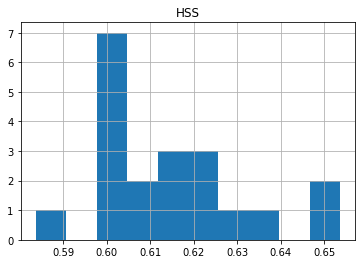

In [10]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [11]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [12]:

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:20<00:00,  2.77s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.88,0.82,None,0.88,9.45
LabelSpreading,0.88,0.82,None,0.88,14.34
ExtraTreesClassifier,0.90,0.79,None,0.90,1.93
LGBMClassifier,0.89,0.78,None,0.89,1.39
BaggingClassifier,0.88,0.78,None,0.88,5.64
RandomForestClassifier,0.89,0.76,None,0.88,7.27
KNeighborsClassifier,0.87,0.76,None,0.87,1.42
Perceptron,0.80,0.75,None,0.82,0.17
ExtraTreeClassifier,0.83,0.73,None,0.83,0.13



Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       460       143   603
No BR/FG    182      2509  2691
All         642      2652  3294
Heidke Skill Score: 0.68

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.72    0.76      0.74   603.00
No BR/FG           0.95    0.93      0.94  2691.00
accuracy           0.90    0.90      0.90     0.90
macro avg          0.83    0.85      0.84  3294.00
weighted avg       0.90    0.90      0.90  3294.00

Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       440       149   589
No BR/FG    230      2475  2705
All         670      2624  3294
Heidke Skill Score: 0.63

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.66    0.75      0.70   589.00
No BR/FG           0.94    0.91   

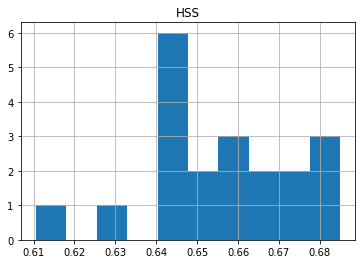

In [15]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.brfg_l
X = df_all1k.iloc[:,1:]

# loop ranadom
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();


In [17]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("brfg_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [16]:
import sklearn
print(sklearn.__version__)

0.24.1


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = df_all1k.drop(columns=["brfg_l"]).columns.to_list() 

# X and Y
Y = df_all1k.brfg_l
X = df_all1k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       341        97   438
No BR/FG    124      1909  2033
All         465      2006  2471
Heidke Skill Score: 0.7

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.73    0.78      0.76   438.00
No BR/FG           0.95    0.94      0.95  2033.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.84    0.86      0.85  2471.00
weighted avg       0.91    0.91      0.91  2471.00

Matriz de Confusión  (Machine Learning)

col_0     BR/FG  No BR/FG   All
brfg_l                         
BR/FG       345       102   447
No BR/FG    117      1907  2024
All         462      2009  2471
Heidke Skill Score: 0.7

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
BR/FG              0.75    0.77      0.76   447.00
No BR/FG           0.95    0.94     

,HSS
count,10.00
mean,0.69
std,0.02
min,0.64
25%,0.68
50%,0.69
75%,0.70
max,0.72
